In [25]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from IPython.display import display
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('heart.csv')
# no need to preprocess strings since dataset is clean

print(df.shape)
display(df.head(5))

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df_nb = df.copy()
df_nb = pd.DataFrame(preprocessing.OrdinalEncoder().fit_transform(df_nb), columns=df_nb.columns)
# OrdinalEncoder will skip numerical values. LabelEncoder also works as they share the same functionality.
display(df_nb.head(5))

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12.0,1.0,1.0,41.0,147.0,0.0,1.0,98.0,0.0,10.0,2.0,0.0
1,21.0,0.0,2.0,55.0,40.0,0.0,1.0,82.0,0.0,20.0,1.0,1.0
2,9.0,1.0,1.0,31.0,141.0,0.0,2.0,25.0,0.0,10.0,2.0,0.0
3,20.0,0.0,0.0,39.0,72.0,0.0,1.0,34.0,1.0,25.0,1.0,1.0
4,26.0,1.0,2.0,49.0,53.0,0.0,1.0,48.0,0.0,10.0,2.0,0.0


In [6]:
nb_train, nb_test = train_test_split(df_nb, test_size=0.2)
X_nb_train, y_nb_train = nb_train.drop(columns=['HeartDisease']), nb_train['HeartDisease']
X_nb_test, y_nb_test = nb_test.drop(columns=['HeartDisease']), nb_test['HeartDisease']
print(X_nb_train.shape, X_nb_test.shape)

(734, 11) (184, 11)


In [9]:
nums = [col for col in X_nb_train.columns if col in cats]

# naive bayes
clf_cat = CategoricalNB()

Z_nb_train = (X_nb_train[nums])
Z_nb_test = (X_nb_test[nums])

clf_cat.fit(Z_nb_train, np.asarray(y_nb_train))

print(classification_report(y_nb_test, clf_cat.predict(Z_nb_test)))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        96
         1.0       0.86      0.86      0.86        88

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [10]:
# SVM classifier
cats = ['HeartDisease', 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
nums = [col for col in df.drop(columns=['HeartDisease']).columns if col not in cats]

df_svm = df.copy()

df_svm = pd.get_dummies(df_svm, columns=cats)
df_svm = df_svm.astype(int)

print(df_svm)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease_0  \
0     40        140          289          0    172        0               1   
1     49        160          180          0    156        1               0   
2     37        130          283          0     98        0               1   
3     48        138          214          0    108        1               0   
4     54        150          195          0    122        0               1   
..   ...        ...          ...        ...    ...      ...             ...   
913   45        110          264          0    132        1               0   
914   68        144          193          1    141        3               0   
915   57        130          131          0    115        1               0   
916   57        130          236          0    174        0               0   
917   38        138          175          0    173        0               1   

     HeartDisease_1  Sex_F  Sex_M  ...  ChestPainTy

In [11]:
svm_train, svm_test = train_test_split(df_svm, test_size=0.2)
X_svm_train, y_svm_train = nb_train.drop(columns=['HeartDisease']), nb_train['HeartDisease']
X_svm_test, y_svm_test = nb_test.drop(columns=['HeartDisease']), nb_test['HeartDisease']

In [12]:
svc_li = SVC(kernel='linear')

scaler = preprocessing.StandardScaler()
scaler.fit(X_svm_train)

Z_svm_train = scaler.transform(X_svm_train)
Z_svm_test = scaler.transform(X_svm_test)

svc_li.fit(Z_svm_train, np.asarray(y_svm_train))

print('Linear Kernel')
print(classification_report(y_svm_test, svc_li.predict(Z_svm_test)))

Linear Kernel
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87        96
         1.0       0.86      0.84      0.85        88

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [13]:
svc_li = SVC(kernel='rbf')

scaler = preprocessing.StandardScaler()
scaler.fit(X_svm_train)

Z_svm_train = scaler.transform(X_svm_train)
Z_svm_test = scaler.transform(X_svm_test)

svc_li.fit(Z_svm_train, np.asarray(y_svm_train))

print('RBF Kernel')
print(classification_report(y_svm_test, svc_li.predict(Z_svm_test)))

RBF Kernel
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89        96
         1.0       0.88      0.86      0.87        88

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [14]:
print(y_svm_train.value_counts())
svc_li = SVC(kernel='linear')
svc_rbf = SVC(kernel='rbf')
ros = RandomOverSampler()
x_os, y_os = ros.fit_resample(X_svm_train, y_svm_train)
print(y_os.value_counts())
svc_li.fit(x_os, y_os)
svc_rbf.fit(x_os, y_os)

# svc rbf.fit(x os, y os)
# Predict and print the classification report
y_pred_rbf = svc_rbf.predict(X_svm_test)
print(classification_report(y_svm_test, y_pred_rbf))
y_pred_li = svc_li.predict(X_svm_test)
print(classification_report(y_svm_test, y_pred_li))

HeartDisease
1.0    420
0.0    314
Name: count, dtype: int64
HeartDisease
1.0    420
0.0    420
Name: count, dtype: int64
              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79        96
         1.0       0.78      0.74      0.76        88

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.78      0.78      0.78       184

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87        96
         1.0       0.86      0.84      0.85        88

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [16]:
print(y_svm_train.value_counts())

ros = RandomOverSampler()
X_os, y_os = ros.fit_resample(X_svm_train, y_svm_train)

print(y_os.value_counts())

HeartDisease
1.0    420
0.0    314
Name: count, dtype: int64
HeartDisease
1.0    420
0.0    420
Name: count, dtype: int64


c:\Users\eepy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


class
5     31
39    30
26    29
48    28
11    28
3     27
29    26
47    26
21    25
12    25
53    23
13    23
8     22
2     21
17    20
24    20
44    19
14    19
25    19
57    19
4     18
20    18
40    18
10    16
16    16
50    16
7     16
22    16
41    16
46    16
31    15
28    15
58    15
52    14
43    14
38    14
35    13
15    12
23    12
19    12
0     11
59    11
55    10
18    10
1      9
37     9
51     9
42     8
32     8
27     8
33     8
45     7
30     6
9      5
54     4
56     4
49     4
6      3
34     1
36     1
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Samples in KMeans Clusters')

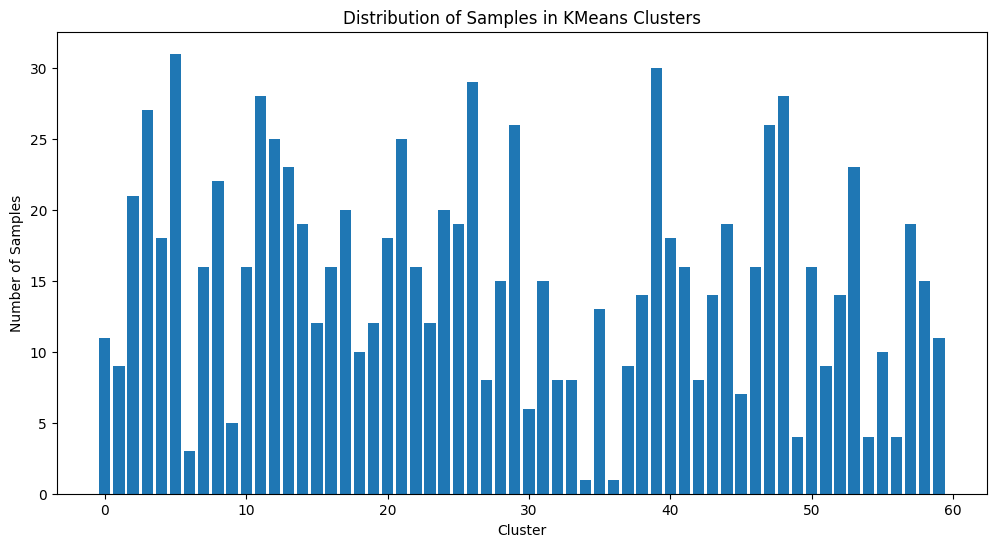

In [19]:
k=60
df = pd.read_csv("heart.csv")
df = df.drop(columns=['HeartDisease', 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
kmeans = KMeans(n_clusters=k)
kmeans_result = kmeans.fit(np.asarray(df))

kmeans_clustering = pd.Series(kmeans_result.labels_, name='class')
kmeans_distribution = kmeans_clustering.value_counts()
print(kmeans_distribution)

# Plot the distribution with a wider x-axis
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Use wider bars on the x-axis
bars = plt.bar(kmeans_distribution.index, kmeans_distribution.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples in KMeans Clusters')

#_ = kmeans_distribution.plot(kind='bar')


In [22]:
gmm = GaussianMixture(n_components=k, init_params='kmeans')
gmm.fit(np.asarray(df))
print(gmm.aic(np.asarray(df)))

16615.072560218705


c:\Users\eepy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


class
0    739
1    179
Name: count, dtype: int64


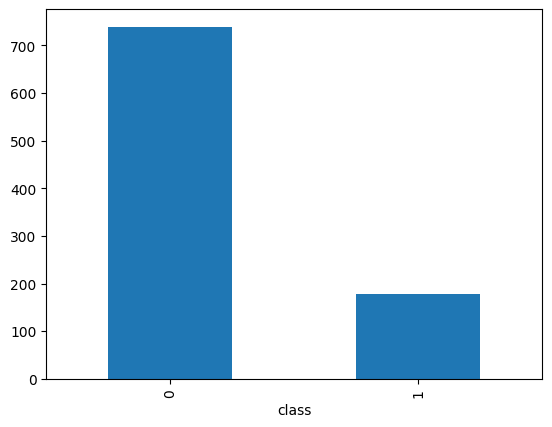

In [23]:
k = 2
kmeans = KMeans(n_clusters=k)

result = kmeans.fit(np.asarray(df))

# print(pd.Series(result.labels_).value_counts())

kmeans_clustering = pd.Series(result.labels_, name='class')
kmeans_distribution = kmeans_clustering.value_counts()
print(kmeans_distribution)

_ = kmeans_distribution.plot(kind='bar')

In [24]:
gmm = GaussianMixture(n_components=k, init_params='kmeans')
gmm.fit(np.asarray(df))
print(gmm.aic(np.asarray(df)))

33477.97542192102


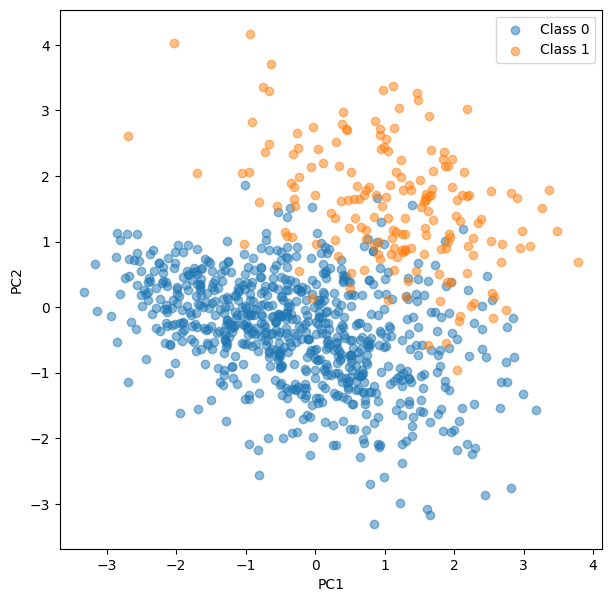

In [26]:
pca = PCA(n_components=2)
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(np.asarray(df))
Z_pca = pca.fit_transform(X)

plt.figure(figsize=(7,7))
plt.scatter(Z_pca[(result.labels_ == 0), 0], Z_pca[(result.labels_ == 0), 1], alpha=0.5, c='tab:blue', label='Class 0')
plt.scatter(Z_pca[(result.labels_ == 1), 0], Z_pca[(result.labels_ == 1), 1], alpha=0.5, c='tab:orange', label='Class 1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [27]:
print("Weights of features in 1st PCA component", pca.components_[0])
print("(Zero indexed) Feature with highest weight is ", np.argmax(np.abs(pca.components_[0])))

Weights of features in 1st PCA component [ 0.56568775  0.31484016 -0.26677216  0.35465064 -0.51126248  0.35005609]
(Zero indexed) Feature with highest weight is  0
